## Caso n4

Con este caso, busco ejemplificar el uso del modelo **Decision Tree** aplicado en el area de la salud, con el objetivo de descubrir alguna enfermedad peligrosa con antelacion,

Aqui se utiliza un ejemplo sencillo,

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
dataset.shape

(303, 14)

In [4]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
corr= dataset.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [7]:
X = dataset.drop('target', axis = 1)
y = dataset['target']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
model = DecisionTreeClassifier()
model.fit (X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = model.predict(X_test)

In [10]:
y_pred = pd.DataFrame(y_pred,columns= ['Y_pred'])

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score,r2_score, classification_report

Matriz_conf = confusion_matrix(y_test, y_pred)
print ("Matriz de Confusion del modelo: ")
Matriz_conf

Matriz de Confusion del modelo: 


array([[32,  9],
       [14, 36]], dtype=int64)

In [12]:
Accuracy = accuracy_score(y_test, y_pred)
print ("Precision del modelo: ")
Accuracy

Precision del modelo: 


0.7472527472527473

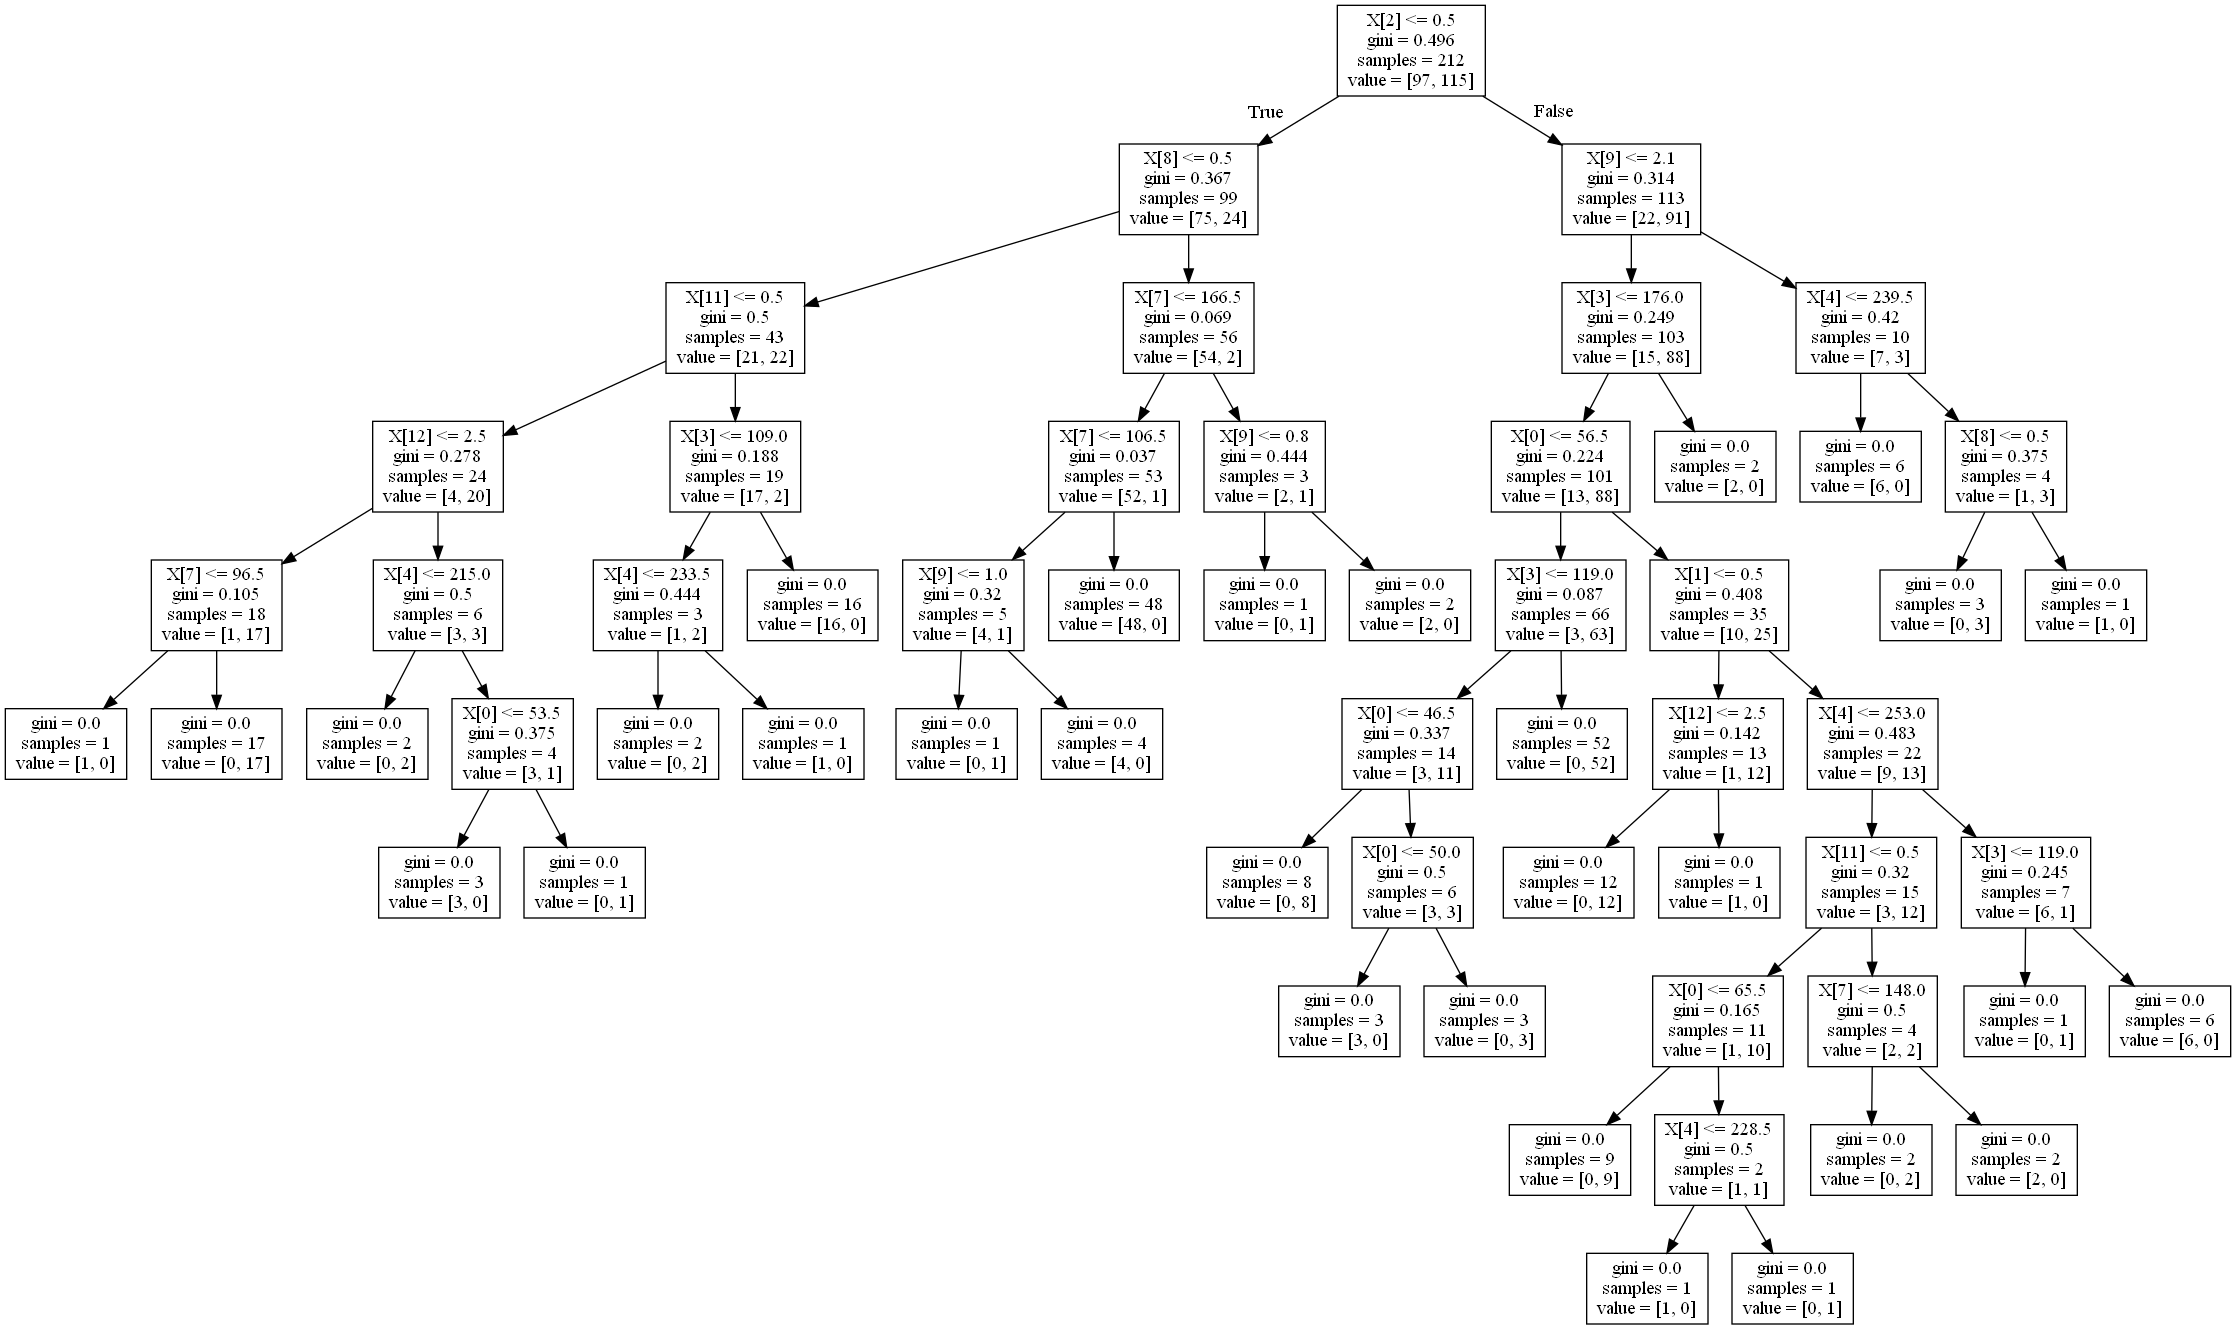

In [13]:
import pydotplus
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = StringIO()
export_graphviz(model, out_file = dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
dot_data.getvalue()
Image(graph.create_png())

En el arbol podemos apreciar que solo las columnas 0(Edad), 1(Genero), 2(Tipo de dolor de pecho), 3(Presion), 4(Coresterol), 7(Ritmo cardiaco maximo), 8(Ejercicio), 9(Depresion) y 12(Duracion ejercicio) son relevantes en el modelo.

Mientras que 5(Azucar en la sangre), 6(Resultado Electrocardiograma), 10(Intensidad ejercicio) y 11(Numero vasos mayores) no influyen a la hora de predecir, con respecto al "6" tiene sentido, ya que su rol es simplemente comprobar el resultado.

Los datos mas relevantes son el 2, 8 y 9.